In [1]:
import yellowbrick as yb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

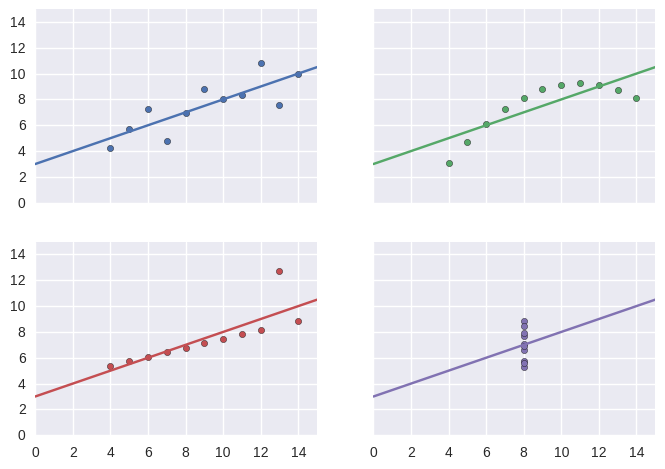

In [3]:
#Anscombe quartet in yellowbrick
yb.anscombe()
plt.show()

In [4]:
#Feature Ranking

In [5]:
from sklearn.datasets import load_boston

In [12]:
data_df_boston = load_boston()
data_boston= data_df_boston.data

In [13]:
target = data_df_boston.target

In [15]:
data_df= pd.DataFrame(data=data,columns=data_df_boston.feature_names)

In [18]:
data_df['target']=data_df_boston.target

In [19]:
data_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [26]:
X= data_df.drop(['target'],axis=1).as_matrix()

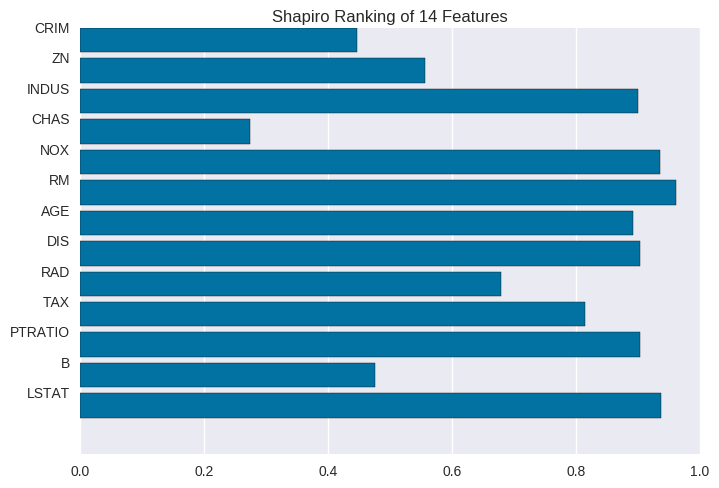

In [28]:
from yellowbrick.features.rankd import Rank1D, Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

visualizer = Rank1D(features=data_df.columns, algorithm='shapiro')

visualizer.fit(X, data_df['target'])                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

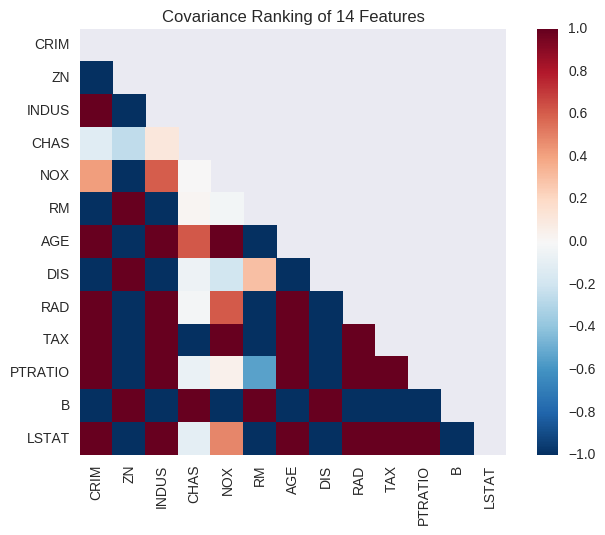

In [31]:
#2D Ranking of features
visualizer = Rank2D(features=data_df.columns, algorithm='covariance')

visualizer.fit(X, data_df['target'])                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

In [33]:
from sklearn.datasets import load_iris
iris_val = load_iris()

In [36]:
iris_val.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
iris_val.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

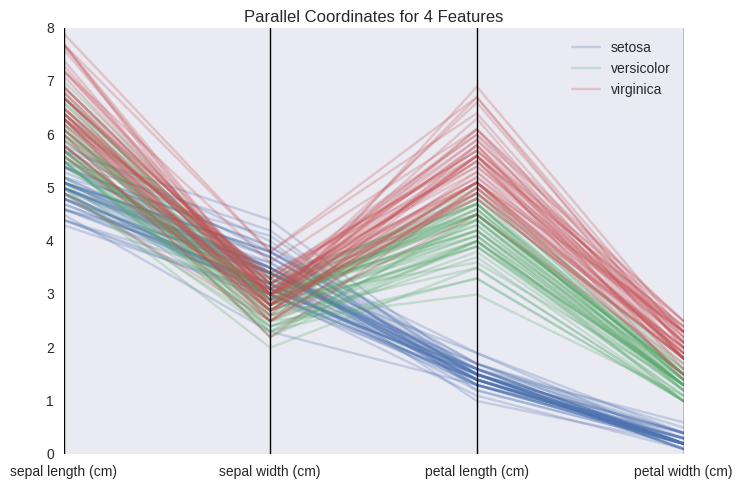

In [39]:


visualizer = ParallelCoordinates(classes=iris_val.target_names, features=iris_val.feature_names)

visualizer.fit(iris_val.data,iris_val.target)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof() 

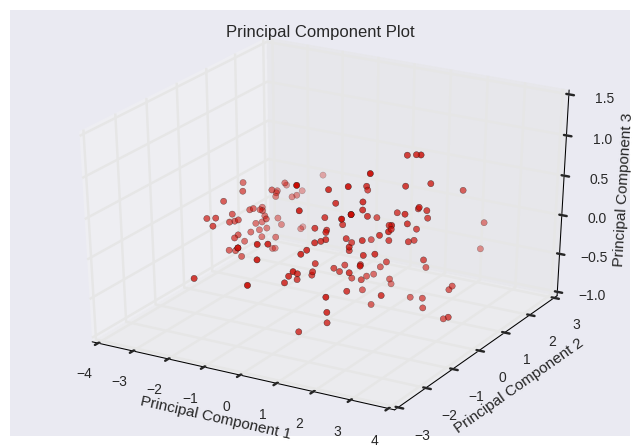

In [44]:
visualizer = PCADecomposition(scale=True, center=False, col=iris_val.target, proj_dim=3,color=["r","g","b"],colormap='RdBu')
visualizer.fit_transform(iris_val.data,iris_val.target)
visualizer.poof()

In [47]:
iris_df = pd.DataFrame(data=iris_val.data,columns=iris_val.feature_names)

In [48]:
iris_df['target']=iris_val.target

In [50]:
X=iris_df[['sepal length (cm)', 'petal length (cm)']].as_matrix()

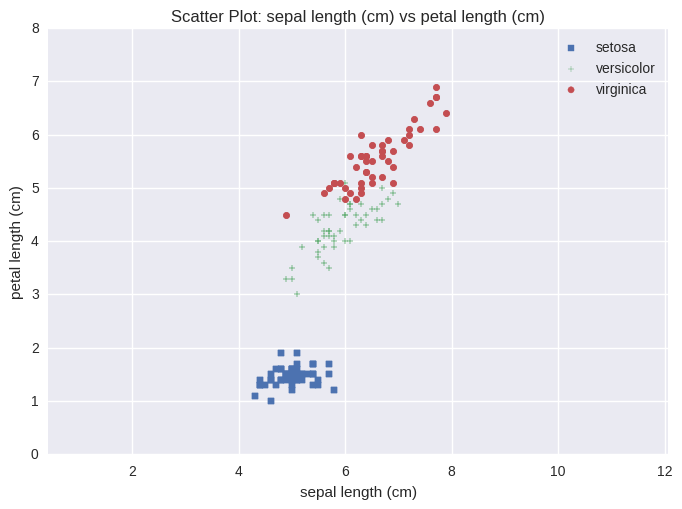

In [51]:
from yellowbrick.features import ScatterVisualizer

visualizer = ScatterVisualizer(x='sepal length (cm)', y='petal length (cm)', classes=iris_val.target_names)

visualizer.fit(X, iris_val.target)
visualizer.transform(X)
visualizer.poof()